In [2]:
import sys

print(sys.version)
print(sys.executable)

3.9.18 (main, Sep 11 2023, 14:09:26) [MSC v.1916 64 bit (AMD64)]
c:\ProgramData\anaconda3\envs\EXAM_ML\python.exe


In [3]:
import pandas as pd

df=pd.read_csv("../data/fish.csv")

In [4]:
target=df["Species"]
feature=df[df.columns[1:]]

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(target)
target=pd.Series(le.transform(target))

In [22]:
target.unique()

array([0, 4, 6, 1, 2, 3, 5])

In [21]:
le.inverse_transform(target.unique())

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [7]:
target.value_counts()

2    56
0    35
4    20
3    17
5    14
1    11
6     6
Name: count, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( feature,target, stratify=target, random_state=11)

In [9]:
print(f"{x_train.shape}{y_train.shape}")
print(f"{x_test.shape}{y_test.shape}")

(119, 5)(119,)
(40, 5)(40,)


In [10]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=10000, solver='liblinear') 
#max_iter : 처음부터 끝까지 몇 번 공부하느냐 
model.fit(x_train,y_train)


LogisticRegression(max_iter=10000, solver='liblinear')

In [11]:
print(model.classes_)
print(model.feature_names_in_)
print(model.coef_)
print(model.intercept_)

[0 1 2 3 4 5 6]
['Weight' 'Length' 'Diagonal' 'Height' 'Width']
[[ 1.31151754e-02 -1.64944477e+00  8.28009628e-01  1.41621597e+00
  -4.15067220e-01]
 [-2.10617657e-02  3.33701594e-01 -9.64909143e-01  2.19381184e+00
   2.66611703e-02]
 [-1.97453974e-03  2.60616873e+00 -2.66412260e+00 -7.93176735e-03
   1.91659551e+00]
 [ 1.01422059e-02  2.55168743e-01  1.51461260e-01 -1.94779290e+00
  -8.36602128e-01]
 [-9.89829706e-03 -1.72578825e+00  1.53807538e+00 -5.12880032e-01
   1.65750894e+00]
 [-7.29426634e-02  3.82049401e-01  1.62783679e-01 -1.55364795e+00
  -5.97839461e-01]
 [ 5.67536045e-03 -5.15807250e-01  2.50622959e-01 -2.45458510e-01
   8.38223028e-01]]
[-0.27362899  0.07982094 -0.34682853 -1.23222237 -1.32590576  0.41907035
 -0.35145235]


In [12]:
model.score(x_test,y_test)

0.975

In [13]:
import numpy as np
y_pre=model.predict(x_test)
data=pd.concat([pd.DataFrame(y_pre), y_test.reset_index(drop=True)], axis=1)
data.columns=["Pre Y","True Y"]
data

Pre Y  True Y
0       0       0
1       1       1
2       0       0
3       2       2
4       2       2
5       5       5
6       2       2
7       2       2
8       3       3
9       4       4
10      5       5
11      2       2
12      4       4
13      5       5
14      3       3
15      1       1
16      0       0
17      2       2
18      2       2
19      0       0
20      0       0
21      0       0
22      0       0
23      2       2
24      2       2
25      1       1
26      3       3
27      2       6
28      2       2
29      0       0
30      4       4
31      3       3
32      2       2
33      0       0
34      2       2
35      4       4
36      2       2
37      4       4
38      5       5
39      2       2

In [14]:
np.round(pd.DataFrame(model.predict_proba(x_test), columns=model.classes_),3)

0      1      2      3      4      5      6
0   0.504  0.311  0.000  0.000  0.173  0.000  0.011
1   0.158  0.730  0.044  0.000  0.057  0.000  0.010
2   0.772  0.024  0.001  0.000  0.180  0.000  0.023
3   0.001  0.089  0.719  0.002  0.155  0.004  0.030
4   0.000  0.021  0.753  0.009  0.176  0.009  0.031
5   0.001  0.012  0.069  0.111  0.212  0.551  0.044
6   0.003  0.000  0.877  0.012  0.000  0.000  0.107
7   0.000  0.000  0.937  0.009  0.034  0.000  0.020
8   0.000  0.000  0.069  0.924  0.000  0.000  0.007
9   0.032  0.007  0.232  0.001  0.620  0.000  0.109
10  0.001  0.016  0.112  0.105  0.151  0.578  0.038
11  0.000  0.000  0.948  0.007  0.024  0.000  0.021
12  0.003  0.035  0.361  0.002  0.541  0.000  0.058
13  0.002  0.014  0.087  0.108  0.209  0.531  0.050
14  0.000  0.000  0.085  0.905  0.008  0.000  0.002
15  0.189  0.636  0.083  0.000  0.074  0.000  0.018
16  0.949  0.000  0.000  0.000  0.005  0.000  0.045
17  0.000  0.005  0.744  0.009  0.212  0.001  0.029
18  0.002  0.000  0.868  0.011  0.000  0.000  0.120
19  0.941  0.001  0.000  0.000  0.012  0.000  0.046
20  0.968  0.001  0.001  0.000  0.004  0.000  0.026
21  0.965  0.009  0.000  0.000  0.012  0.000  0.014
22  0.934  0.000  0.001  0.000  0.021  0.000  0.044
23  0.001  0.100  0.632  0.005  0.183  0.039  0.040
24  0.001  0.039  0.686  0.003  0.220  0.001  0.050
25  0.129  0.625  0.102  0.000  0.118  0.000  0.025
26  0.000  0.000  0.103  0.895  0.001  0.000  0.001
27  0.004  0.002  0.628  0.002  0.294  0.000  0.071
28  0.000  0.002  0.885  0.012  0.080  0.000  0.021
29  0.951  0.000  0.000  0.000  0.006  0.000  0.043
30  0.001  0.001  0.155  0.010  0.769  0.000  0.063
31  0.000  0.000  0.005  0.728  0.258  0.000  0.008
32  0.002  0.071  0.415  0.020  0.203  0.237  0.052
33  0.555  0.176  0.001  0.000  0.257  0.000  0.010
34  0.000  0.016  0.784  0.004  0.167  0.001  0.027
35  0.003  0.058  0.213  0.006  0.643  0.020  0.057
36  0.001  0.000  0.912  0.002  0.005  0.000  0.079
37  0.003  0.013  0.100  0.005  0.821  0.001  0.058
38  0.001  0.011  0.106  0.147  0.170  0.515  0.049
39  0.006  0.127  0.338  0.024  0.124  0.309  0.071

In [15]:
#https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier


In [16]:
# 모델 성능 평가 
# 정확도, 정밀도, 재현율, F1-Score, Confusion Metrics, Classification Report

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


print(classification_report(y_test, model.predict(x_test), zero_division=1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         3
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         4
           6       1.00      0.00      0.00         1

    accuracy                           0.97        40
   macro avg       0.99      0.86      0.85        40
weighted avg       0.98      0.97      0.96        40



In [17]:
f1_score(y_test, model.predict(x_test), average='weighted')

0.9629310344827587

In [18]:
recall_score(y_test, model.predict(x_test), average='micro')

0.975

In [19]:
# https://en.wikipedia.org/wiki/Confusion_matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix


confusion_matrix(y_test, model.predict(x_test))

array([[ 9,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0],
       [ 0,  0, 14,  0,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  5,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  1,  0,  0,  0,  0]], dtype=int64)

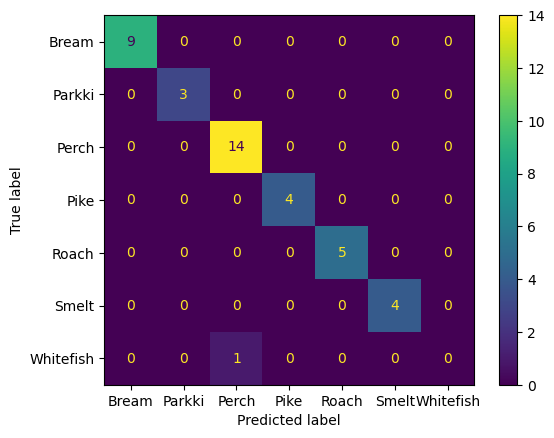

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
conplot=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pre), display_labels=le.inverse_transform(model.classes_))
conplot.plot()
plt.show()